In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# read file into dataframe
filepath = "credit_card3.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
0,C10001,40.900749,0.166667,1000.0,139.509787,16.6667
1,C10002,3202.467416,0.000000,7000.0,1072.340217,0.0000
2,C10003,2495.148862,1.000000,7500.0,627.284787,100.0000
3,C10004,1666.670542,0.083333,7500.0,NaN,8.3333
4,C10005,817.714335,0.083333,1200.0,244.791237,8.3333


In [3]:
df=df.drop(['PURCHASES_FREQUENCY'],axis=1)

In [4]:
df.head()

,CUST_ID,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
0,C10001,40.900749,1000.0,139.509787,16.6667
1,C10002,3202.467416,7000.0,1072.340217,0.0000
2,C10003,2495.148862,7500.0,627.284787,100.0000
3,C10004,1666.670542,7500.0,NaN,8.3333
4,C10005,817.714335,1200.0,244.791237,8.3333


In [5]:
df=df.drop(['CUST_ID'],axis=1)
df.head()

,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
0,40.900749,1000.0,139.509787,16.6667
1,3202.467416,7000.0,1072.340217,0.0000
2,2495.148862,7500.0,627.284787,100.0000
3,1666.670542,7500.0,NaN,8.3333
4,817.714335,1200.0,244.791237,8.3333


In [6]:
#filling missing values with mean ones
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
#filling missing values with mean ones
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [7]:
df.isnull().sum()

BALANCE             0
CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
Purchase Score      0
dtype: int64

In [8]:
colheader = {'BALANCE': 'BALANCE',
             'MINIMUM_PAYMENTS':'PAYMENTS', 
             'CREDIT_LIMIT':'LIMIT',
             'Purchase Score':'Score'}

df.rename(columns=colheader, inplace=True)

In [9]:
df.head()

,BALANCE,LIMIT,PAYMENTS,Score
0,40.900749,1000.0,139.509787,16.6667
1,3202.467416,7000.0,1072.340217,0.0000
2,2495.148862,7500.0,627.284787,100.0000
3,1666.670542,7500.0,864.206542,8.3333
4,817.714335,1200.0,244.791237,8.3333


In [10]:
def BALANCE_groups(BALANCE):
    if BALANCE <= 5000:
        group = '0-5000'
    elif BALANCE <= 10000:
        group = '5001-10000'
    elif BALANCE < 15000:
        group = '10001-14999'
    elif BALANCE >= 15001:
        group = '15001+'
        
    return group

In [11]:
df['BALANCE_groups'] = df['BALANCE'].apply(BALANCE_groups)

In [12]:
def PAYMENTS_groups(PAYMENTS):
    if PAYMENTS <= 200:
        group = '0-$200'
    elif PAYMENTS <= 500:
        group = '$201-$500'
    elif PAYMENTS < 600:
        group = '$501-$599'
    elif PAYMENTS >= 600:
        group = '$600+'
        
    return group

In [13]:
df['PAYMENTS_groups'] = df['PAYMENTS'].apply(PAYMENTS_groups)

In [14]:
df.head()

,BALANCE,LIMIT,PAYMENTS,Score,BALANCE_groups,PAYMENTS_groups
0,40.900749,1000.0,139.509787,16.6667,0-5000,0-$200
1,3202.467416,7000.0,1072.340217,0.0000,0-5000,$600+
2,2495.148862,7500.0,627.284787,100.0000,0-5000,$600+
3,1666.670542,7500.0,864.206542,8.3333,0-5000,$600+
4,817.714335,1200.0,244.791237,8.3333,0-5000,$201-$500


In [15]:
df=df.drop(['LIMIT'],axis=1)

In [16]:
df.head()

,BALANCE,PAYMENTS,Score,BALANCE_groups,PAYMENTS_groups
0,40.900749,139.509787,16.6667,0-5000,0-$200
1,3202.467416,1072.340217,0.0000,0-5000,$600+
2,2495.148862,627.284787,100.0000,0-5000,$600+
3,1666.670542,864.206542,8.3333,0-5000,$600+
4,817.714335,244.791237,8.3333,0-5000,$201-$500


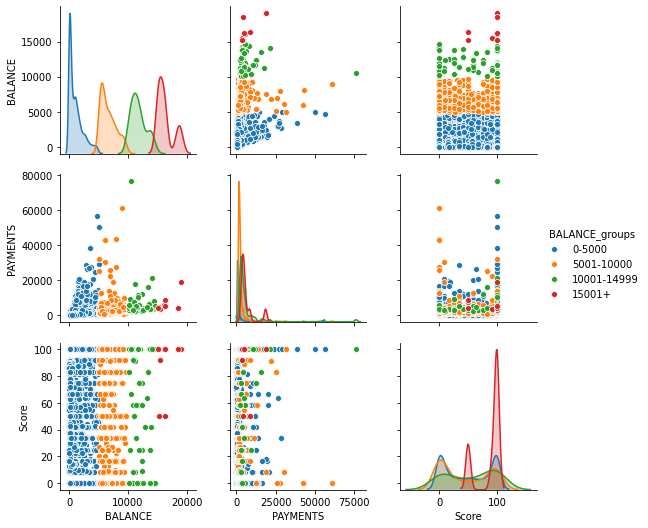

In [18]:
sns.pairplot(data=df, hue="BALANCE_groups")

In [19]:
X = df[['BALANCE', 'PAYMENTS', 'Score']]
X.head()

,BALANCE,PAYMENTS,Score
0,40.900749,139.509787,16.6667
1,3202.467416,1072.340217,0.0000
2,2495.148862,627.284787,100.0000
3,1666.670542,864.206542,8.3333
4,817.714335,244.791237,8.3333


In [20]:
kmeans = KMeans(n_clusters=5)

In [21]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
kmeans.cluster_centers_

array([[7.24661034e+03, 2.68292925e+03, 4.61388444e+01],
       [5.34826308e+02, 3.18069206e+02, 5.09089077e+01],
       [6.67408078e+03, 5.26204330e+04, 5.71428571e+01],
       [4.03178545e+03, 1.61724368e+04, 4.74918054e+01],
       [2.90607252e+03, 1.25895249e+03, 4.40402583e+01]])

In [23]:
df['cluster'] = kmeans.labels_
df.head()

,BALANCE,PAYMENTS,Score,BALANCE_groups,PAYMENTS_groups,cluster
0,40.900749,139.509787,16.6667,0-5000,0-$200,1
1,3202.467416,1072.340217,0.0000,0-5000,$600+,4
2,2495.148862,627.284787,100.0000,0-5000,$600+,4
3,1666.670542,864.206542,8.3333,0-5000,$600+,1
4,817.714335,244.791237,8.3333,0-5000,$201-$500,1


C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\no

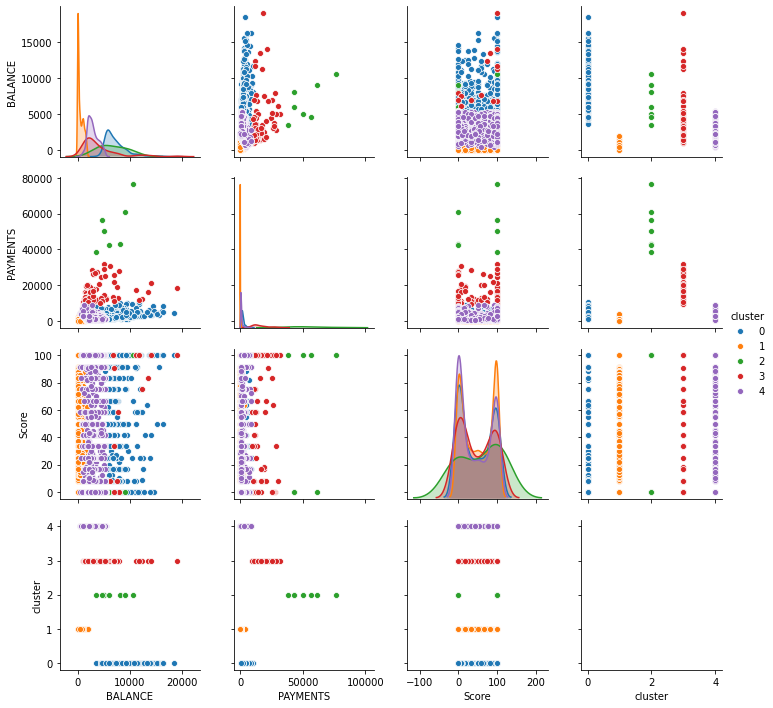

In [24]:
sns.pairplot(data=df, hue='cluster')

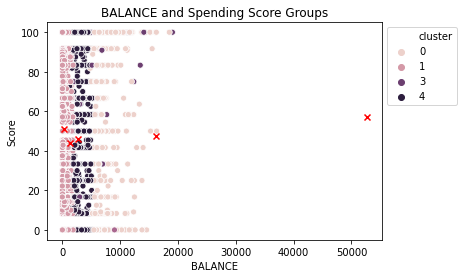

In [25]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='BALANCE', y='Score', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("BALANCE and Spending Score Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

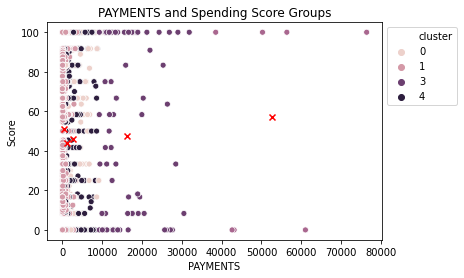

In [26]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='PAYMENTS', y='Score', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("PAYMENTS and Spending Score Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [27]:
cluster = df.loc[df['cluster'] == 0]
cluster.head()

,BALANCE,PAYMENTS,Score,BALANCE_groups,PAYMENTS_groups,cluster
15,6886.213231,2109.906490,50.0000,5001-10000,$600+,0
21,6369.531318,1659.775075,100.0000,5001-10000,$600+,0
24,5368.571219,1657.002877,0.0000,5001-10000,$600+,0
28,7152.864372,1648.851345,66.6667,5001-10000,$600+,0
30,12136.219960,3292.015030,100.0000,10001-14999,$600+,0


In [28]:
len(cluster)

632

In [29]:
cluster.describe()

,BALANCE,PAYMENTS,Score,cluster
count,632.000000,632.000000,632.000000,632.0
mean,7243.544349,2680.696899,46.065840,0.0
std,2140.170145,1556.363806,41.584449,0.0
min,3583.515054,804.712610,0.000000,0.0
25%,5718.989150,1712.268253,0.000000,0.0
50%,6670.216274,2204.252981,41.666700,0.0
75%,8087.802077,2984.904308,91.666700,0.0
max,18495.558550,10285.134120,100.000000,0.0


In [31]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Income Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_PAYMENTS = small_df['PAYMENTS'].min()
    max_PAYMENTS = small_df['PAYMENTS'].max()
    avg_score = small_df['Score'].mean()
    
    print(f"Cluster {cluster_num}: ${min_PAYMENTS}-{max_PAYMENTS}K, avg score: {int(avg_score)}")

Cluster Income Ranges

Cluster 0: $804.7126099999999-10285.13412K, avg score: 46
Cluster 1: $0.019163-4034.532894K, avg score: 50
Cluster 2: $38512.12477-76406.20752000001K, avg score: 57
Cluster 3: $9285.151136-31871.36379K, avg score: 47
Cluster 4: $217.42520499999998-8791.735512000001K, avg score: 44


In [32]:
# new customer with Age=32, Income=$75K, and spending score=68
customer = [165, 700, 68]

customer_group = kmeans.predict([customer])

print(f"Cluster assignment: {customer_group}")

Cluster assignment: [1]
